<div style=" color: white; text-align:center; font-size:30px; border-radius:20px; background: rgb(63,94,251);
background: linear-gradient(90deg, rgba(63,94,251,1) 0%, rgba(70,245,252,0.9251050762101716) 100%); height:90px; justify-content: center; align-self:center; padding-top:35px; border:1px solid black; width: 90% ; margin-left:5%; text-decoration:underline; ">Plus court chemin : Dijkstra</div>
<p style="font-style:italic; text-align:center">Projet realisé par : CAMARA Moustapha et BUZURA Darius</p><hr>
<p style = "text-indent:25px;" >Dans les cadre de la <a style = "color:blue; font-style:italic; text-decoration:none; font-weight:bold;" href= "https://www.ataraxy.info/COEUR/Modules/MethodesNumeriques/SAE/Catalogue.pdf" >SAE 2.02 : Exploitation algorithmique d'un problème</a> nous étions chargé de réaliser un projet mathématique, de démontrer un thèoréme mathématique graçe à l'informatique. Nous avons choisi de réaliser le projet : Plus court chemin grâce à Dijkstra qui étais disponible dans le catalogue de sujets mises à notre disposition. Nous étions encadrées par Madame NASSIET Aurelie.</p><br>

<p>La description qu nou à été donnée : </p>
<ul>
    <li style = "font-weight:bold">Niveau de difficulté : <span style = "font-weight:normal">☆</span></li><br>
    <li style = "font-weight:bold">Description : <span style = "font-weight:normal">Étant donné un graphe (orienté ou non) nous avons vu une méthode permettant de
déterminer les plus court chemin partant de n'importe quel sommet. C'est l'algorithme de Dijkstra</span></li><br>
    <li style = "font-weight:bold">Animation : <span style = "font-weight:normal">Les différentes étapes de l'algorithme sur un graphe pris au hasard ou saisi par l'utilisateur</span></li>
</ul>
<p><span style = "font-weight:bold">Durée de travail et organisation : </span><span>Nous avons travaillé environ 15h sur ce projet, et nous nous sommes réunis plusieurs fois à la Bibliothèque Universitaire pour la recherche des solutions et l'organisation du travail, ensuite chacun devait rendre son travail à un certaine deadline pour le mettre en commun. La répartition des tâches étais équivalente sur chaque partie.</span></p>

<p style = "font-style:italic;">Attention : Pour maintenir une bonne lisibilité et un bon affichage des images, merci de bien garder les images qui se trouvent dans le même dossier que le document en <code>.html</code> et <code>.ipynb</code> .</p>


<div style= "height: 50px; background: rgb(63,94,251);
background: linear-gradient(90deg, rgba(63,94,251,1) 0%, rgba(67,167,252,1) 51%, rgba(70,92,252,0.9251050762101716) 100%); width: 350px; border-radius: 20px; text-align:center; padding-top:15px; border: 1px solid black; color:white;">Les bibliothèques dont nous avons eu besoin :</div>
<p style = "font-style:italic;">Merci de bien les exécuter dès le début pour éviter les erreurs.</p>

In [44]:
import random
import string
from matplotlib.pyplot import *
from IPython.display import HTML
import matplotlib.animation as animation
from matplotlib import image 
import matplotlib.pyplot as plt

<h1>Choix de la structure des données :</h1>
<p style ="text-indent:20px" >Tout d'abord nous avons réfléchi à comment ranger les données que nous utilisons. Travailler avec des tableaux ou avec des dictionnaires ? Le fait que nous traitons des noms de sommets / points qui sont de type <code>String</code> et des distances qui sont de type <code>Int</code> nous permettait pas vraiment d'utiliser des tableaux. Cela aurait pu être possible mais avec des algorithmes énormes qui auraient énormément ralenti notre recherche. Il aurait fallu choisir des données de plusieurs tableaux et les regrouper ...</p>
<p style = "text-indent:5px "> Finalement, notre choix qui nous semblait le plus adapté était de choisir des dictionnaires.</p>
<p>Prenons un dictionnaire de points</p>
<code>points = {}</code>
<p>ensuite un point sera la clé (*1), qui aura en valeur un dictionnaire contenant des points en tant que clé (*2) et des distances entre clé (*1) et clé (*2)</p>

In [23]:
points = {}
#ensuite nous allons alimenter ce dictionnaire avec un point A et un point B et la distance de A vers B
points['A'] = {'B' : 3}
print("Voici la structure sur la quelle nous nous sommes bassée :")
print(points.items())

Voici la structure sur la quelle nous nous sommes bassée :
dict_items([('A', {'B': 3})])


<p>Sauf que B avec une distance de 3, n'est pas les seul point qui peut être relié à  A ! </p>
<p style = "font-weight:bold"> Relions A à d'autres points :</p>

In [24]:
points['A'] = {'B' : 3, 'C' : 5, 'D' : 6}
print(points.items())
# A est reliée à B, C, D avec des sitances différentes 

dict_items([('A', {'B': 3, 'C': 5, 'D': 6})])


<h3>Nous avons ensuite divisé en deux parties, une partie de graphe saisi par l'utilisateur et une partie généré aléatoire</h3>

<div style = "height: 60px; background: rgb(63,94,251);
background: linear-gradient(90deg, rgba(63,94,251,1) 0%, rgba(67,167,252,1) 51%, rgba(70,92,252,0.9251050762101716) 100%); width: 80%; border-radius: 20px; text-align:center; padding-top:20px; border: 1px solid black; color:white; font-size:30px; margin-left:10%;" >PARTIE 1 : Saisie par l'utilisateur : </div>

<p style = "text-indent: 25px"> Le programme suivant semblait être le plus adapté à représenter l'algorithme de dijkstra car il prend en compte les noms des points plus leurs distances. D’autres algorithmes ne prennent pas en compte les noms des points en utilisant que des listes. L’utilisation de dictionnaire était donc selon nous la meilleure solution.</p>

In [37]:
#algorithme de dijkstra
def dijkstra(matrice, source):
    assert all(matrice[u][v] >= 0 for u in matrice.keys() for v in matrice[u].keys())
    precedent = {x:None for x in matrice.keys()}
    dejaTraite = {x:False for x in matrice.keys()}
    distance =  {x:float('inf') for x in matrice.keys()}
    distance[source] = 0
    a_traiter = [(0, source)]
    while a_traiter:
        dist_noeud, noeud = a_traiter.pop()
        if not dejaTraite[noeud]:
            dejaTraite[noeud] = True
            for voisin in matrice[noeud].keys():
                dist_voisin = dist_noeud + matrice[noeud][voisin]
                if dist_voisin < distance[voisin]:
                    distance[voisin] = dist_voisin
                    precedent[voisin] = noeud
                    a_traiter.append((dist_voisin, voisin))
        a_traiter.sort(reverse=True)
    return distance, precedent

<p>À partir de s’est distancé et c’est précédent nous allons pouvoir organiser notre rendu de manière plus ordonné en montrant les différents  points Par lesquelles nous sommes passés pour arriver à notre point d’arriver plus la distance parcourue</p>

In [38]:
#obtenir le trajet a effectué
def trajet(precedent,arriver):
    tab=[arriver]
    while precedent.get(tab[-1]) is not None:
        tab.append(precedent.get(tab[-1]))
    tab.reverse()
    return tab

In [39]:
#obtenir le trajet à effectuer + sa distance

def  dijkstra_final(matrice,depart,arriver):
    distance, precedent = dijkstra(matrice,depart)
    print(matrice)
    return trajet(precedent,arriver),distance.get(arriver)


<h1>Démontrons avec un problème concret :</h1>

<p>Un jour nous avons décidé de prendre notre voiture et de faire le trajet Paris-Marseille. Nous souhaitons trouver le chemin le plus rapide tout en visitant d'autres villes pendant notre trajet.</p>

<img src="image1.png" style="width:500px; height:300px">

<h3>Comment l'algorithme de Dijkstra pourrait nous aider à résoudre ce problème ?</h3>
<p>Tout d'abord, nous allons placer les points sur les villes par lesquelles nous allons potentiellement passer.Tout en restant dans l'ambiance des graphes, on va les considérer les points placées, comme des sommets d'un graphe.</p>

<img src="image2.png" style="width:500px; height:300px">

<p>Maintenant il faudrait bien relié par des routes ces villes (on relient les sommets du graphe)</p>

<img src="image3.png" style="width:500px; height:300px">

In [28]:

france={}
france['PARIS']={'LYON':5,'NANTES':4, 'LILLE':2, 'TOULOUSE':7}
france['LYON']={'PARIS':5,'MONTPELLIER':5,'NICE':5}
france['NICE']={'LYON':5,'MARSEILLE':3}
france['LILLE']={'PARIS':2,'MARSEILLE':14}
france['NANTES']={'MARSEILLE':9,'PARIS':4, 'TOULOUSE':6}
france['MARSEILLE']={'NICE':3,'LILLE':14, 'MONTPELLIER':2}
france['MONTPELLIER']={'MARSEILLE':2,'TOULOUSE' : 4, 'LYON': 5, 'NANTES': 9}
france['TOULOUSE']={'PARIS': 7, 'NANTES':6, 'MONTPELLIER':4}
   
print("Le trajet retenu avec la distance totale et les villes parcourues est :", str(dijkstra_final(france,'PARIS','MARSEILLE')))

{'PARIS': {'LYON': 5, 'NANTES': 4, 'LILLE': 2, 'TOULOUSE': 7}, 'LYON': {'PARIS': 5, 'MONTPELLIER': 5, 'NICE': 5}, 'NICE': {'LYON': 5, 'MARSEILLE': 3}, 'LILLE': {'PARIS': 2, 'MARSEILLE': 14}, 'NANTES': {'MARSEILLE': 9, 'PARIS': 4, 'TOULOUSE': 6}, 'MARSEILLE': {'NICE': 3, 'LILLE': 14, 'MONTPELLIER': 2}, 'MONTPELLIER': {'MARSEILLE': 2, 'TOULOUSE': 4, 'LYON': 5, 'NANTES': 9}, 'TOULOUSE': {'PARIS': 7, 'NANTES': 6, 'MONTPELLIER': 4}}
Le trajet retenu avec la distance totale et les villes parcourues est : (['PARIS', 'LYON', 'MONTPELLIER', 'MARSEILLE'], 12)


<img src="image10.png" style="width:500px; height:300px">

<h3>Animation : (tentative)</h3>

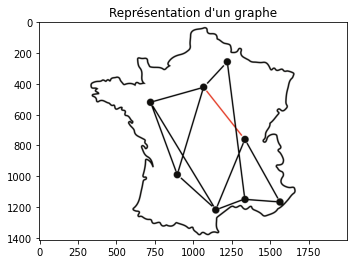

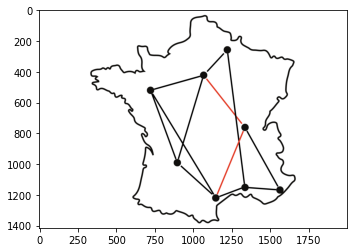

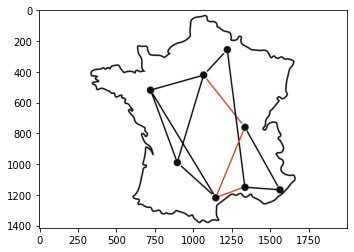

In [46]:
###############################################
#        INITIALISATION DE LA FENETRE         #
###############################################
fig = figure()


title("Représentation d'un graphe") 

    
grid(False)

###############################################
#           MA FONCTION D'ANIMATION           #
###############################################


def MonAnimation() :
    i = 4
    while i < 7:
        ima = "image"+str(i)+".png"
        img = image.imread(ima)
        plt.imshow(img)
        plt.show()
        i += 1
    return ()

MonAnimation()

###############################################
#           CREATION DE L'ANIMATION           #
###############################################
ani = animation.FuncAnimation(fig, MonAnimation)

<div style = "height: 60px; background: rgb(63,94,251);
background: linear-gradient(90deg, rgba(63,94,251,1) 0%, rgba(67,167,252,1) 51%, rgba(70,92,252,0.9251050762101716) 100%); width: 80%; border-radius: 20px; text-align:center; padding-top:20px; border: 1px solid black; color:white; font-size:30px; margin-left:10%;" >PARTIE 2 : Dijkstra aléatoire : </div>

<p>Afin de générer une matrice aléatoire il nous faut tout d’abord générer des noms aléatoires.</p>

In [31]:
#obtenir une chaine de caractère aléatoire 
def chaine_alea(longueur):    
    str = string.ascii_uppercase
    return ''.join(random.choice(str) for i in range(longueur))
print(chaine_alea(5))

JJKTN


<p>Il faut ensuite générer tous nos points .</p>

In [32]:
#obtenir un tableau de chaine de caractère aléatoire

def nom_points_aleatoire(longueur):

    str = string.ascii_uppercase
    tab = []
    for i in range(longueur):
        t = (chaine_alea(5))
        j = 0
        while j < len(tab):
            if tab[j] == t :
                t = (chaine_alea(5))
            j += 1
        tab.append(t)

    return tab


print(nom_points_aleatoire(6))

['YFATP', 'MNKHY', 'DLBMO', 'CUHFL', 'IZPGU', 'OSPZU']


<p>Les distances elles aussi sont générées aléatoirement de la manière suivante.</p>

In [33]:
#obtenir un tableau de distance aléatoire


def distances_aleatoire(taille):
    tab_point_alea = []
    i = 0
    while i < int(taille):
        tab_point_alea.append(random.randint(1,100))
        i+= 1

    return tab_point_alea

print(distances_aleatoire(5))

[40, 34, 37, 72, 74]


<p>Il faut ensuite associer les distances au point.</p>

In [34]:
#couple distance + point

def diagramme(points,tab):
    k = tab
    l = distances_aleatoire(points)
    diag ={}
    i = 0
    while i <len(k):
        diag.update({k[i] : l[i]})
        i += 1
    return diag
    
print(diagramme(5,nom_points_aleatoire(5)))

{'OOJNY': 47, 'DGBQC': 19, 'HYTXS': 50, 'CROOE': 64, 'PBVNI': 19}


<p>On peut par la suite générer la matrice de la manière suivante.</p>

In [35]:
#obtenir une matrice aléatoire

def matrice_primaire_alea(nbr_de_point):
    matrice_prim={}
    a=nom_points_aleatoire(nbr_de_point)
    i=0
    while len(matrice_prim.keys())<nbr_de_point:
        matrice_prim[a[i]] = diagramme(nbr_de_point,a)      
        i+=1
    return matrice_prim, matrice_prim.keys()
print(matrice_primaire_alea(5))

({'CLQEU': {'CLQEU': 21, 'LJIES': 61, 'IPIRQ': 61, 'AMOZA': 87, 'HPLKJ': 69}, 'LJIES': {'CLQEU': 43, 'LJIES': 29, 'IPIRQ': 99, 'AMOZA': 94, 'HPLKJ': 84}, 'IPIRQ': {'CLQEU': 42, 'LJIES': 53, 'IPIRQ': 15, 'AMOZA': 91, 'HPLKJ': 57}, 'AMOZA': {'CLQEU': 20, 'LJIES': 16, 'IPIRQ': 76, 'AMOZA': 41, 'HPLKJ': 38}, 'HPLKJ': {'CLQEU': 74, 'LJIES': 55, 'IPIRQ': 10, 'AMOZA': 81, 'HPLKJ': 82}}, dict_keys(['CLQEU', 'LJIES', 'IPIRQ', 'AMOZA', 'HPLKJ']))


<p>Le programme suivant nous permet quand tu vas lui d’entrer les paramètres nécessaires le point d’arrivée le point de départ est le nombre de points pour ensuite effectuer l’algorithme de Dijkstra</p>

In [36]:
#obtenir le trajet à effectuer + sa distance pour une matrice aléatoire

def  dijkstra_final_aleatoire():
    print("combien de point voulez vous dans votre matrice?")
    a, b=matrice_primaire_alea(int(input()))
    
    print("les different point du graphe sont",b)
    print("quel est votre point de depart?")
    depart=input()
    print("quel est votre point d'arriver?")
    arriver=input()
    print (a)
    return "Le trajet finale est " + str(dijkstra_final(a,depart,arriver))
    

print(dijkstra_final_aleatoire())

combien de point voulez vous dans votre matrice?
5
les different point du graphe sont dict_keys(['OWRJM', 'OPGPD', 'VPPNN', 'FIOXS', 'SDCIW'])
quel est votre point de depart?
OWRJM
quel est votre point d'arriver?
FIOXS
{'OWRJM': {'OWRJM': 55, 'OPGPD': 100, 'VPPNN': 24, 'FIOXS': 78, 'SDCIW': 13}, 'OPGPD': {'OWRJM': 64, 'OPGPD': 99, 'VPPNN': 23, 'FIOXS': 30, 'SDCIW': 69}, 'VPPNN': {'OWRJM': 74, 'OPGPD': 62, 'VPPNN': 70, 'FIOXS': 33, 'SDCIW': 56}, 'FIOXS': {'OWRJM': 72, 'OPGPD': 42, 'VPPNN': 96, 'FIOXS': 67, 'SDCIW': 49}, 'SDCIW': {'OWRJM': 10, 'OPGPD': 88, 'VPPNN': 43, 'FIOXS': 67, 'SDCIW': 79}}
{'OWRJM': {'OWRJM': 55, 'OPGPD': 100, 'VPPNN': 24, 'FIOXS': 78, 'SDCIW': 13}, 'OPGPD': {'OWRJM': 64, 'OPGPD': 99, 'VPPNN': 23, 'FIOXS': 30, 'SDCIW': 69}, 'VPPNN': {'OWRJM': 74, 'OPGPD': 62, 'VPPNN': 70, 'FIOXS': 33, 'SDCIW': 56}, 'FIOXS': {'OWRJM': 72, 'OPGPD': 42, 'VPPNN': 96, 'FIOXS': 67, 'SDCIW': 49}, 'SDCIW': {'OWRJM': 10, 'OPGPD': 88, 'VPPNN': 43, 'FIOXS': 67, 'SDCIW': 79}}
Le trajet finale 

<div style = "height: 60px; background: rgb(63,94,251);
background: linear-gradient(90deg, rgba(63,94,251,1) 0%, rgba(67,167,252,1) 51%, rgba(70,92,252,0.9251050762101716) 100%); width: 80%; border-radius: 20px; text-align:center; padding-top:20px; border: 1px solid black; color:white; font-size:30px; margin-left:10%;" >PARTIE 3 : TABLEAU : </div>

<p>Prenons la représentation sagittale qui suit (elle à été généré sur le site <a style = "color:blue; font-style:italic; text-decoration:none; font-weight:bold" href = "https://www.ataraxy.info/AlgoGraphe">Ataraxy</a>.)</p>

<img src="representation.png" style="width:500px; height:200px">

<p>L'application de l'algorithme de Dijkstra, est aussi possible grâce au tableau suivant.</p>
<p>Prenons le tableau suivant. Nous allons placer dans l'ordre les points :</p>

<div style ="margin: 0px 25%; position: relative; display: block; text-indent: 0; width: 400px; height:305px; 
             border:1px solid black; overflow: hidden;">
    <span style = "position:absolute; width:80px; height:350px; border:1px solid black; " ><span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; margin:0px 0px; overflow: hidden;"></span></span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:80px; overflow: hidden; padding-left:10px; " >
        <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x1</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:120px; overflow: hidden; padding-left:10px;" >
        <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x2</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:160px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x3</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:200px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x4</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:240px; overflow: hidden;padding-left:10px; " >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x5</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:280px; overflow: hidden;padding-left:10px; " >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x6</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:320px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x7</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:360px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x8</span>
    </span>
    <! -- partie 2 -->
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; margin-top:30px; overflow: hidden;">
    <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">Init</span>
     <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px "><span><span></span></span></span>
    </span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
        <span style = "position:absolute; width:40px; height:35px; padding-top:3px; font-size:25px; padding-left:30px; "></span>
    </span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
    </span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    
</div>

<p>Ensuite nous allons initialiser notre point de départ à 0.</p>
<p>Après, nous allons sélectionner la distance en l'encadrant .</p>

<div style ="margin: 0px 25%; position: relative; display: block; text-indent: 0; width: 400px; height:305px; 
             border:1px solid black; overflow: hidden;">
    <span style = "position:absolute; width:80px; height:350px; border:1px solid black; " ><span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; margin:0px 0px; overflow: hidden;"></span></span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:80px; overflow: hidden; padding-left:10px; " >
        <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">a</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:120px; overflow: hidden; padding-left:10px;" >
        <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">b</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:160px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">c</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:200px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">d</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:240px; overflow: hidden;padding-left:10px; " >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">e</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:280px; overflow: hidden;padding-left:10px; " >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">f</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:320px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">g</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:360px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">h</span>
    </span>
    <!-- partie 2 -->
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; margin-top:30px; overflow: hidden;">
    <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">Init</span>
     <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px "><span style = "border: 1px solid black;"><span>0</span></span></span>
    </span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
        <span style = "position:absolute; width:40px; height:35px; padding-top:3px; font-size:25px; padding-left:30px; "></span>
    </span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
    </span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;"></span>
    

</div>

<p>Et remplacer le reste des cases par des <code>X</code>.</p>
<p>Ensuite on place sur la deuxième ligne à gauche le sommet que nous allons analyser. Dans ce cas <code style = "font-style:italic;">x1</code>.</p>

<div style ="margin: 0px 25%; position: relative; display: block; text-indent: 0; width: 400px; height:305px; 
             border:1px solid black; overflow: hidden;">
    <span style = "position:absolute; width:80px; height:350px; border:1px solid black; " ><span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; margin:0px 0px; overflow: hidden;"></span></span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:80px; overflow: hidden; padding-left:10px; " >
        <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x1</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:120px; overflow: hidden; padding-left:10px;" >
        <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x2</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:160px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x3</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:200px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x4</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:240px; overflow: hidden;padding-left:10px; " >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x5</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:280px; overflow: hidden;padding-left:10px; " >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x6</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:320px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x7</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:360px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x8</span>
    </span>
    
   <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; margin-top:30px; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">Init</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px "><span style = "border: 1px solid black;"><span>0</span></span></span>
   </span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">x1</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span></span>
    
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; "></span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span></span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; "></span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span></span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; "></span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span></span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; "></span><span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span></span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; "></span><span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span></span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; "></span><span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span></span>
    
</div>

<p>Ensuite on refait les mêmes étapes, jusqu'a arriver à un tableau final resemblant à cela :</p>

<div style ="margin: 0px 25%; position: relative; display: block; text-indent: 0; width: 400px; height:305px; 
             border:1px solid black; overflow: hidden;">
    <span style = "position:absolute; width:80px; height:350px; border:1px solid black; " ><span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; margin:0px 0px; overflow: hidden;"></span></span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:80px; overflow: hidden; padding-left:10px; " >
        <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x1</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:120px; overflow: hidden; padding-left:10px;" >
        <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x2</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:160px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x3</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:200px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x4</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:240px; overflow: hidden;padding-left:10px; " >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x5</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:280px; overflow: hidden;padding-left:10px; " >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x6</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:320px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x7</span>
    </span>
    <span style = "position:absolute; width:40px; height:350px; border:1px solid black; margin-left:360px; overflow: hidden; padding-left:10px;" >
    <span style = " position:absolute; width:40px; height:30px; padding-top:3px; font-size:25px;">x8</span>
    </span>
    
   <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; margin-top:30px; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">Init</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px "><span style = "border: 1px solid black;"><span>0</span></span></span>
   </span>
    
   <span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">x1</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:3px; font-size:25px; padding-left:30px; "><span style = "position:absolute; width:40px; height:35px; padding-top:2px; font-size:25px; padding-left:25px; margin-left:75px;"><span style = "border: 1px solid black; "><span>1</span></span></span></span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:3px; font-size:25px; padding-left:30px; "><span style = "position:absolute; width:40px; height:35px; padding-top:2px; font-size:25px; padding-left:25px; margin-left:235px;"><span style = "border: 1px solid black; "><span>1</span></span></span></span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:3px; font-size:25px; padding-left:30px; "><span style = "position:absolute; width:40px; height:35px; padding-top:2px; font-size:25px; padding-left:25px; margin-left:315px;"><span style = "border: 1px solid black; "><span>1</span></span></span></span>
    </span>
    
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">x2</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:110px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:3px; font-size:25px; padding-left:30px; "><span style = "position:absolute; width:40px; height:35px; padding-top:2px; font-size:25px; padding-left:25px; margin-left:155px;"><span style = "border: 1px solid black; "><span>2</span></span></span></span>
    <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:270px;">1</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:3px; font-size:25px; padding-left:30px; "><span style = "position:absolute; width:40px; height:35px; padding-top:2px; font-size:25px; padding-left:25px; margin-left:275px;"><span style = "border: 1px solid black; "><span>2</span></span></span></span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:350px;">1</span>
    </span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">x6</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:110px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:190px;">2</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:270px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:310px;">2</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:350px;">1</span>
    </span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">x8</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:110px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:190px;">2</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:270px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:310px;">2</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:350px;">X</span>
    </span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">x4</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:110px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:190px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:270px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:310px;">2</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:350px;">X</span>
    </span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">x7</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:110px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:190px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:3px; font-size:25px; padding-left:30px; "><span style = "position:absolute; width:40px; height:35px; padding-top:2px; font-size:25px; padding-left:25px; margin-left:195px;"><span style = "border: 1px solid black; "><span>3</span></span></span></span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:270px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:310px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:350px;">X</span>
    </span>
    
<span style = "position:relative;display:inline-block; width:400px; height: 30px; border-bottom:1px solid black; overflow: hidden;">
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; ">x5</span>
       <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:70px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:110px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:3px; font-size:25px; padding-left:30px; "><span style = "position:absolute; width:40px; height:35px; padding-top:2px; font-size:25px; padding-left:25px; margin-left:120px;"><span style = "border: 1px solid black; "><span>4</span></span></span></span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:190px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:230px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:270px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:310px;">X</span>
        <span style = "position:absolute; width:40px; height:35px; padding-top:5px; font-size:25px; padding-left:20px; margin-left:350px;">X</span>
    </span>
    
</div>
<br>
<div style = "margin-left:30%; font-style:italic;">Ce tableau à été réfait à partir du modèle vu en cours !</div>

<p style = "font-style:italic; text-indent:25px;">ATTENTION :Le tableau à été codé sur un fichier <code>.ipynb</code> Il sérait possible que le tableau ne soit pas fonctionnel en mode html et des bug d'affichage serait presents. Pour assurer une bonne lisibilité voici aussi le même tableau mais en version image.</p>
<img src="tableau.png" style="width:500px; height:400px">

<h1>C'est la fin de notre document </h1>